# TensorFlow API: tf.keras搭建网络八股
    #六步法
    import
    train, test
    model=tf.keras.models.Sequential(前向传播） / class MyModel
    
   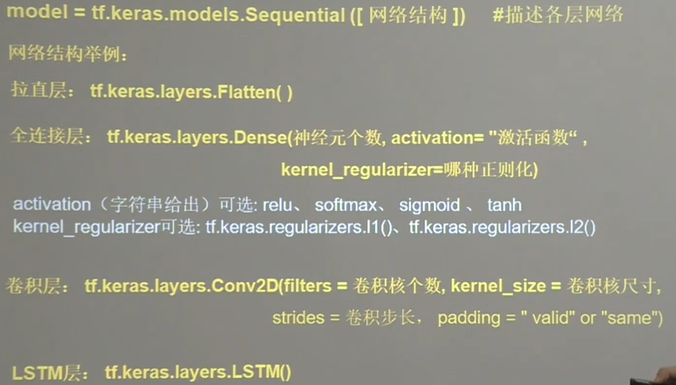
   
    model.compile(配置训练方法：优化器；损失函数；评测指标）
   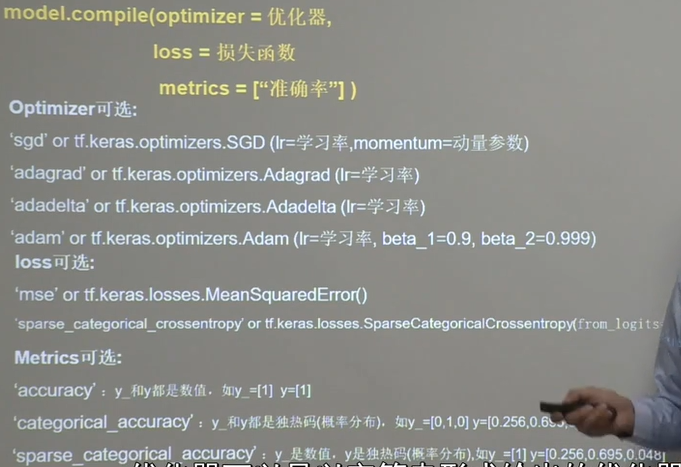
   
    #from_logits=Flase(询问神经网络输出前是否经过概率分布）
    model.fit（告知训练集测试集标签，batch多少）
    
   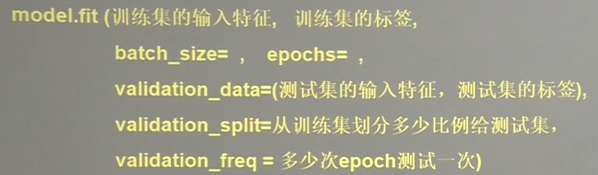
   
    model.summary（打印网络结构和参数统计）
    ![image-4.png](attachment:image-4.png)

In [ ]:
# MINIST数据集
plt.imshow(x_train[0],cmap='gray')
plt.show()
print("x_train[0]:\n", x_train[0])
print("y_train[0]:", y_train[0])
print("x_test.shape:", x_test.shape)

In [2]:
#数据集读入
import tensorflow as tf
import numpy as np
import csv
#csv_file = open('/Users/93554/AMLS_assignment20_21-/dataset_AMLS_20-21/celeba/labels.csv', 'r', newline = '', encoding = 'utf-8')
csv_file = open('./dataset_AMLS_20-21/celeba/labels.csv', 'r', newline = '')
#read cvs file
reader = csv.reader(csv_file)
rows= [row for row in reader]
csv_file.close()

#create symbols(gender,smiling)
Y = np.zeros((5000,2),dtype='int64')
#neglet the first row of names
rows = rows[1:]

# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 
# from list get str get array symbols
for i in range(len(rows)):
    str0 = listToString(rows[i])
    y = str0.split('\t')
    y = np.array(y)
    #print(y)
    Y[i,0] = y[2]
    Y[i,1] = y[3]
#-------------用panda读取y    
name = ['gender', 'smiling']
#data = pd.read_csv('./dataset_AMLS_20-21/celeba/labels.csv',sep='\t',header=0,names = name)
data = pd.read_csv('./dataset_AMLS_20-21/celeba/labels.csv',sep='\t')
Y_A10=data['gender']
Y_A11=data['smiling']
y_1 = Y[:,0]
y_2 = Y[:,1]
#---------------X;X可以用panda读吗？不行。。。我创建data数据集的时候没有加标签...
data_csv = open('data.csv', 'r', newline = '')
#read cvs file
reader = csv.reader(data_csv)
rows= [row for row in reader]
data_csv.close()
X = np.zeros((5000,38804),dtype='float')
for i in range(len(rows)):
    str0 = listToString(rows[i])
    x = str0.split(' ')
#list-str-float
    for j in range(X.shape[1]):
        x[j] = float(x[j])
    X[i,:] = x

In [23]:
y_1 = Y[:,0]
y_2 = Y[:,1]
for i in range(y_1.shape[0]):
    if y_1[i] == -1:
        y_1[i] = 0
    else:
        y_1[i] = 1 #防止标签出现负数，如果这里负数的话后面计算loss就会出现nan
for i in range(y_2.shape[0]):
    if y_2[i] == -1:
        y_2[i] = 0
    else:
        y_2[i] = 1
# classes = 2
# y_1 = tf.one_hot(y_1,depth=classes)
# print(output[0:10])
#print(X[0,0:10])

In [21]:
#预测是否smiling;ummm学习率太大了的感觉;
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_1,random_state=0)
#实现MINIST数据集识别
# import tensorflow as tf
# mnist = tf.keras.datasets.mnist
# (x_train,y_train),(x_test,y_test)= mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

#用sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),#第一层神经网络有128神经元
    tf.keras.layers.Dense(2,activation='softmax')#使输出满足概率分布
])
#用类
# class MnistModel(Model):
#     def__init__(self):
#         super(MnistMoodel,self).__init__()
#         self.flatten = Flatten()
#         self.d1 = Dense(128, activation='relu')
#         self.d1 = Dense(10, activation='softmax')
#     def call(self,x):
#         x = self.flatten(x)
#         x = self.d1(x)
#         y = self.d2(x)
#         return y

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=15, epochs=10, validation_data=(x_test, y_test),validation_freq=1)#每迭代一次执行一次测试机评测
model.summary()

Train on 3750 samples, validate on 1250 samples
Epoch 1/10
3750/3750 [==============================] - 2s 502us/sample - loss: 1.8338 - sparse_categorical_accuracy: 0.6504 - val_loss: 1.5054 - val_sparse_categorical_accuracy: 0.6176
Epoch 2/10
3750/3750 [==============================] - 2s 413us/sample - loss: 1.0365 - sparse_categorical_accuracy: 0.7187 - val_loss: 0.5213 - val_sparse_categorical_accuracy: 0.7896
Epoch 3/10
3750/3750 [==============================] - 2s 409us/sample - loss: 0.4481 - sparse_categorical_accuracy: 0.8136 - val_loss: 0.8090 - val_sparse_categorical_accuracy: 0.7112
Epoch 4/10
3750/3750 [==============================] - 2s 426us/sample - loss: 0.5992 - sparse_categorical_accuracy: 0.7888 - val_loss: 0.3810 - val_sparse_categorical_accuracy: 0.8424
Epoch 5/10
3750/3750 [==============================] - 2s 415us/sample - loss: 0.3623 - sparse_categorical_accuracy: 0.8459 - val_loss: 0.3702 - val_sparse_categorical_accuracy: 0.8448
Epoch 6/10
3750/3750 [

In [24]:
#预测男女
x_train, x_test, y_train_2, y_test_2 = train_test_split(X, y_2,random_state=0)
#实现MINIST数据集识别
# import tensorflow as tf
# mnist = tf.keras.datasets.mnist
# (x_train,y_train),(x_test,y_test)= mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

#用sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),#第一层神经网络有128神经元
    tf.keras.layers.Dense(2,activation='softmax')#使输出满足概率分布
])
#用类
# class MnistModel(Model):
#     def__init__(self):
#         super(MnistMoodel,self).__init__()
#         self.flatten = Flatten()
#         self.d1 = Dense(128, activation='relu')
#         self.d1 = Dense(10, activation='softmax')
#     def call(self,x):
#         x = self.flatten(x)
#         x = self.d1(x)
#         y = self.d2(x)
#         return y

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train_2, batch_size=15, epochs=10, validation_data=(x_test, y_test_2),validation_freq=1)#每迭代一次执行一次测试机评测
model.summary()

Train on 3750 samples, validate on 1250 samples
Epoch 1/10
3750/3750 [==============================] - 2s 493us/sample - loss: 1.2057 - sparse_categorical_accuracy: 0.6507 - val_loss: 0.5052 - val_sparse_categorical_accuracy: 0.7672
Epoch 2/10
3750/3750 [==============================] - 2s 405us/sample - loss: 0.5330 - sparse_categorical_accuracy: 0.7491 - val_loss: 0.5117 - val_sparse_categorical_accuracy: 0.7544
Epoch 3/10
3750/3750 [==============================] - 2s 418us/sample - loss: 0.4746 - sparse_categorical_accuracy: 0.7800 - val_loss: 0.3584 - val_sparse_categorical_accuracy: 0.8352
Epoch 4/10
3750/3750 [==============================] - 2s 412us/sample - loss: 0.3700 - sparse_categorical_accuracy: 0.8384 - val_loss: 0.3583 - val_sparse_categorical_accuracy: 0.8344
Epoch 5/10
3750/3750 [==============================] - 2s 408us/sample - loss: 0.4148 - sparse_categorical_accuracy: 0.8133 - val_loss: 0.7506 - val_sparse_categorical_accuracy: 0.7016
Epoch 6/10
3750/3750 [